<a href="https://colab.research.google.com/github/iamX55/mL-project/blob/main/mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First deep leaRNING project


In [ ]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

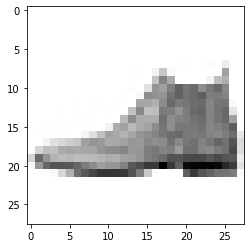

In [ ]:
plt.imshow(X_test[0],cmap="Greys")

In [ ]:
class_labels=["T-shirt/top","Trouser","pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
x_train = X_train/255
X_test = X_test/255

In [ ]:
model= keras.models.Sequential([
                keras.layers.Flatten(input_shape=[28,28]),
                keras.layers.Dense(units=100,activation='relu'),
                keras.layers.Dense(units=10,activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1053 - accuracy: 0.6725
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7055 - accuracy: 0.7397
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6108 - accuracy: 0.7835
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5631 - accuracy: 0.8036
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5251 - accuracy: 0.8184
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.8242
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8330
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4800 - accuracy: 0.8368
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4724 - accuracy: 0.8397
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.472

In [ ]:
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8387


[0.5018608570098877, 0.8386833071708679]

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred[0].round(2)

array([0.25, 0.01, 0.18, 0.11, 0.03, 0.06, 0.25, 0.04, 0.07, 0.01],
      dtype=float32)

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [ ]:
y_pred_labels[:10]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,[np.argmax(i) for i in y_pred])

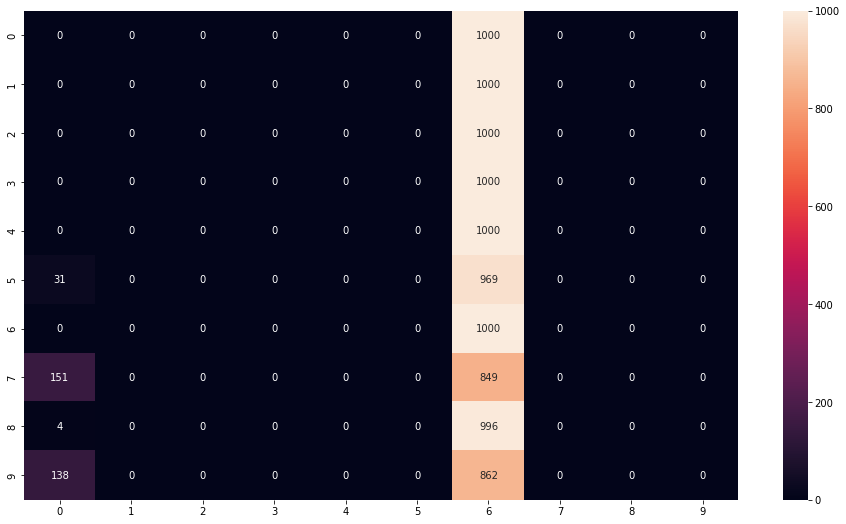

In [ ]:
plt.figure(figsize =(16,9))
sn.heatmap(cm,annot=True,fmt = "d")

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels,target_names = class_labels,)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.10      1.00      0.19      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.8057 - accuracy: 0.1000


[2.805687665939331, 0.10000000149011612]

In [ ]:
model.save("MNIST_classifier_nn_model.h5")